In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error


In [3]:
# Run this cell to import or install the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues

try:
    import sagemaker_datawrangler
except ImportError:
    !pip install --upgrade sagemaker-datawrangler
    import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

In [9]:
df=pd.read_csv('Fractionator.csv')

In [10]:
from datetime import date
df['Time']=pd.to_datetime(df['Time'])

In [11]:
df=df.set_index('Time')

In [12]:
manipulated_variables=[
                       "AI_2020_OVERHEAD_C5'S_MOL", 
                       "AI_2021_MIDDLE_C7'S_MOL",
                       "AI_2022_BOTTOM_C3'S_MOL"
                        ]

controlled_variables=[
       'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
       'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 
       'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF'
                    ]

response_variables=[
       'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
       'FIC-2101_PV_TOP_PRODUCT_MBBL/D',
        'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
       'FI-2005_PV_FEED_FLOW_MBBL/D',
       'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
       'FIC_2004_PV_TOP_REFLUX_MBBL/D',
       'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',
                    ]

In [13]:
fig1=plt.figure(figsize = (15, 30))

for i in enumerate(controlled_variables):
    plt.subplot(8, 1,i[0]+1)
    fig1=sns.lineplot(x=df.index,y=df[i[1]])
    fig1.figure.savefig('controlled_variables.png')

    plt.show()

NameError: name 'sns' is not defined

In [14]:
import seaborn as sns
import numpy as np
import os
from scipy import stats

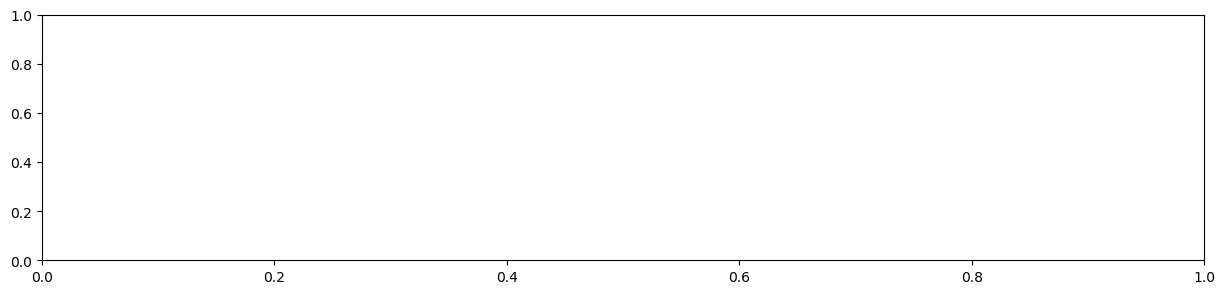

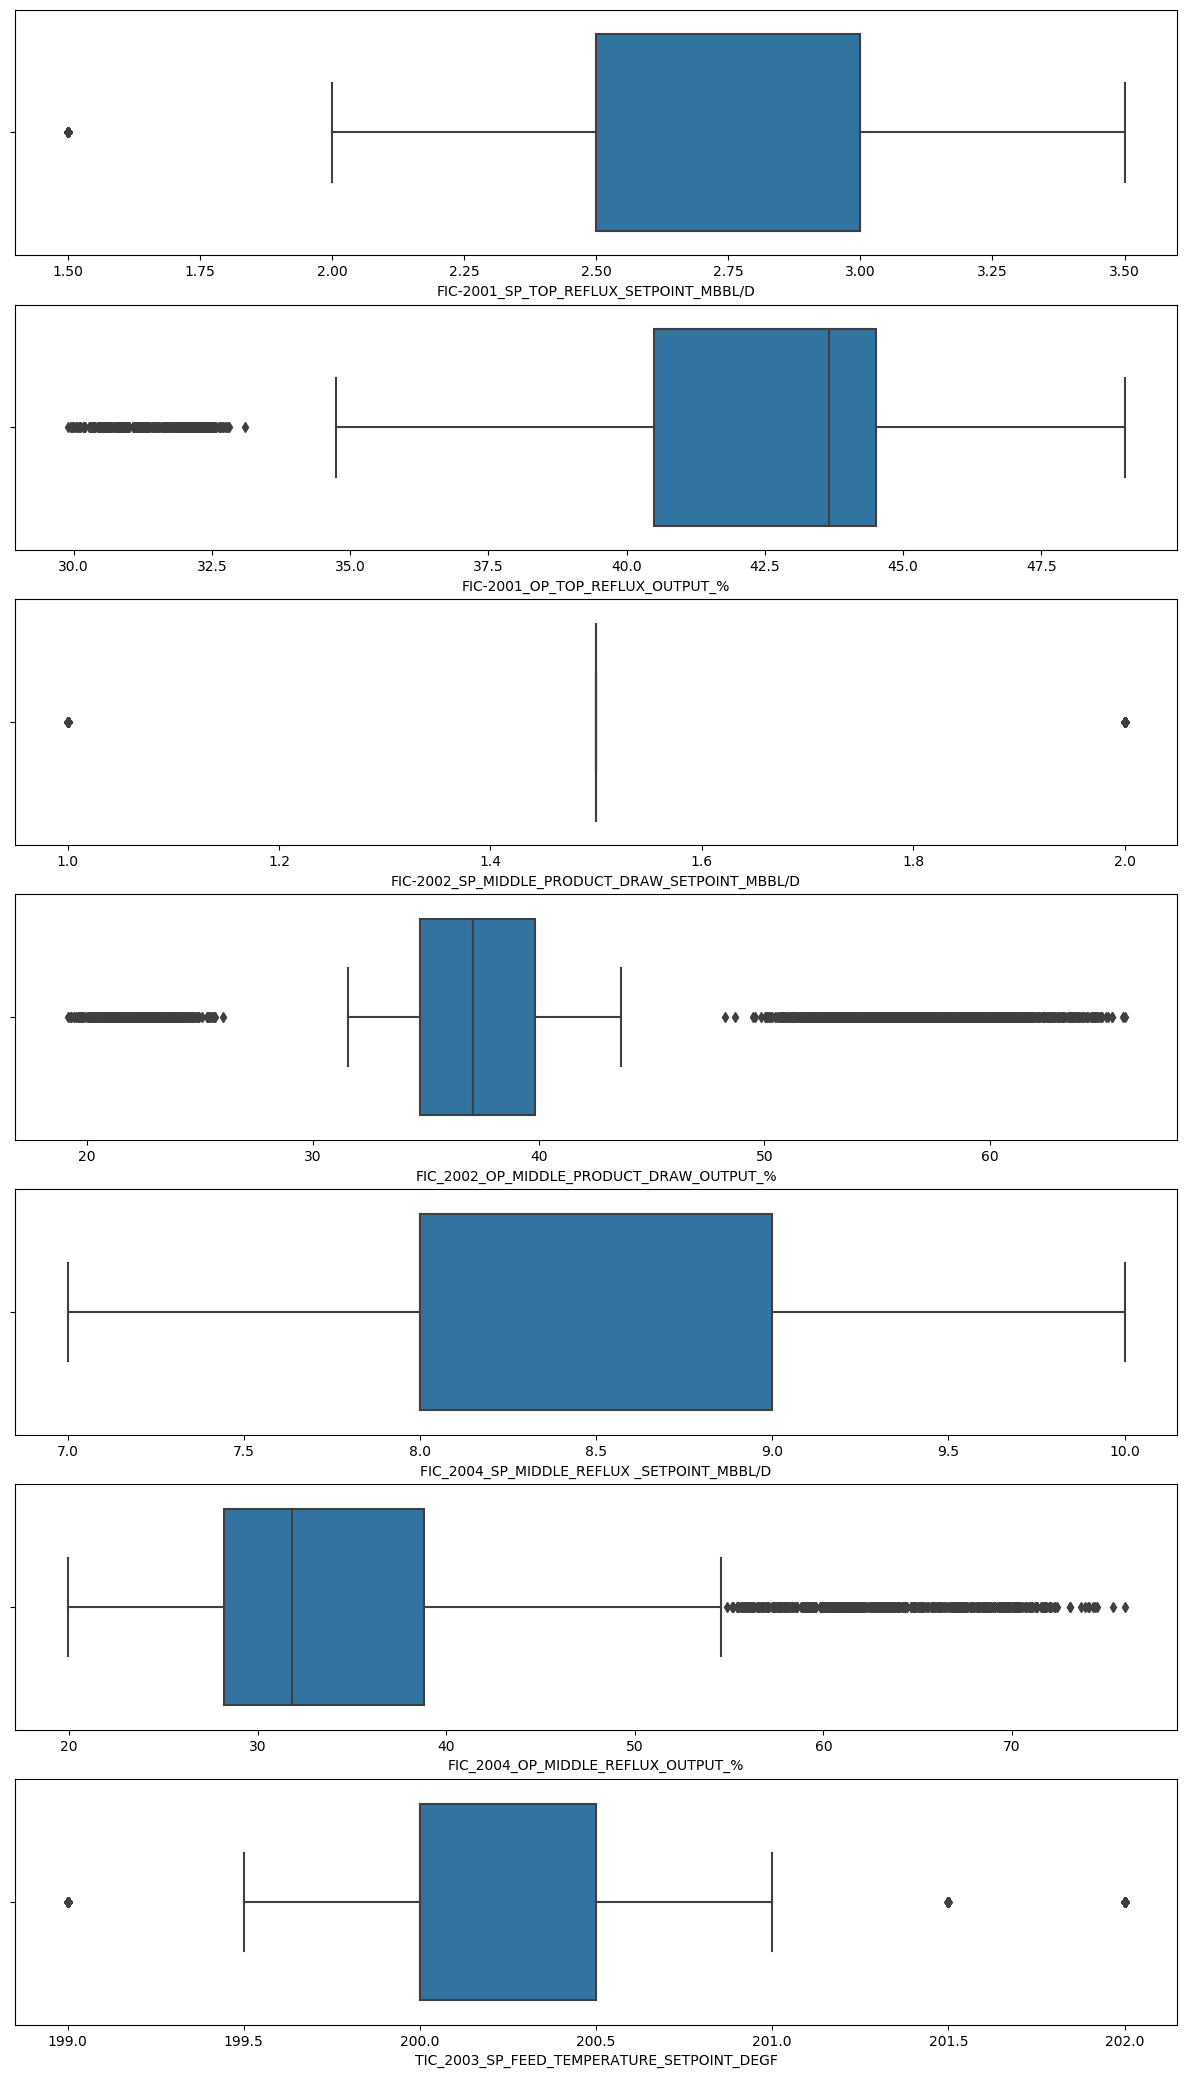

In [15]:
fig2=plt.figure(figsize = (15, 30))

for i in enumerate(controlled_variables):
    plt.subplot(8, 1,i[0]+1)
    fig2=sns.boxplot(df[i[1]])
    fig2.figure.savefig('boxplot.png')
plt.show()

In [16]:
len(manipulated_variables)

3

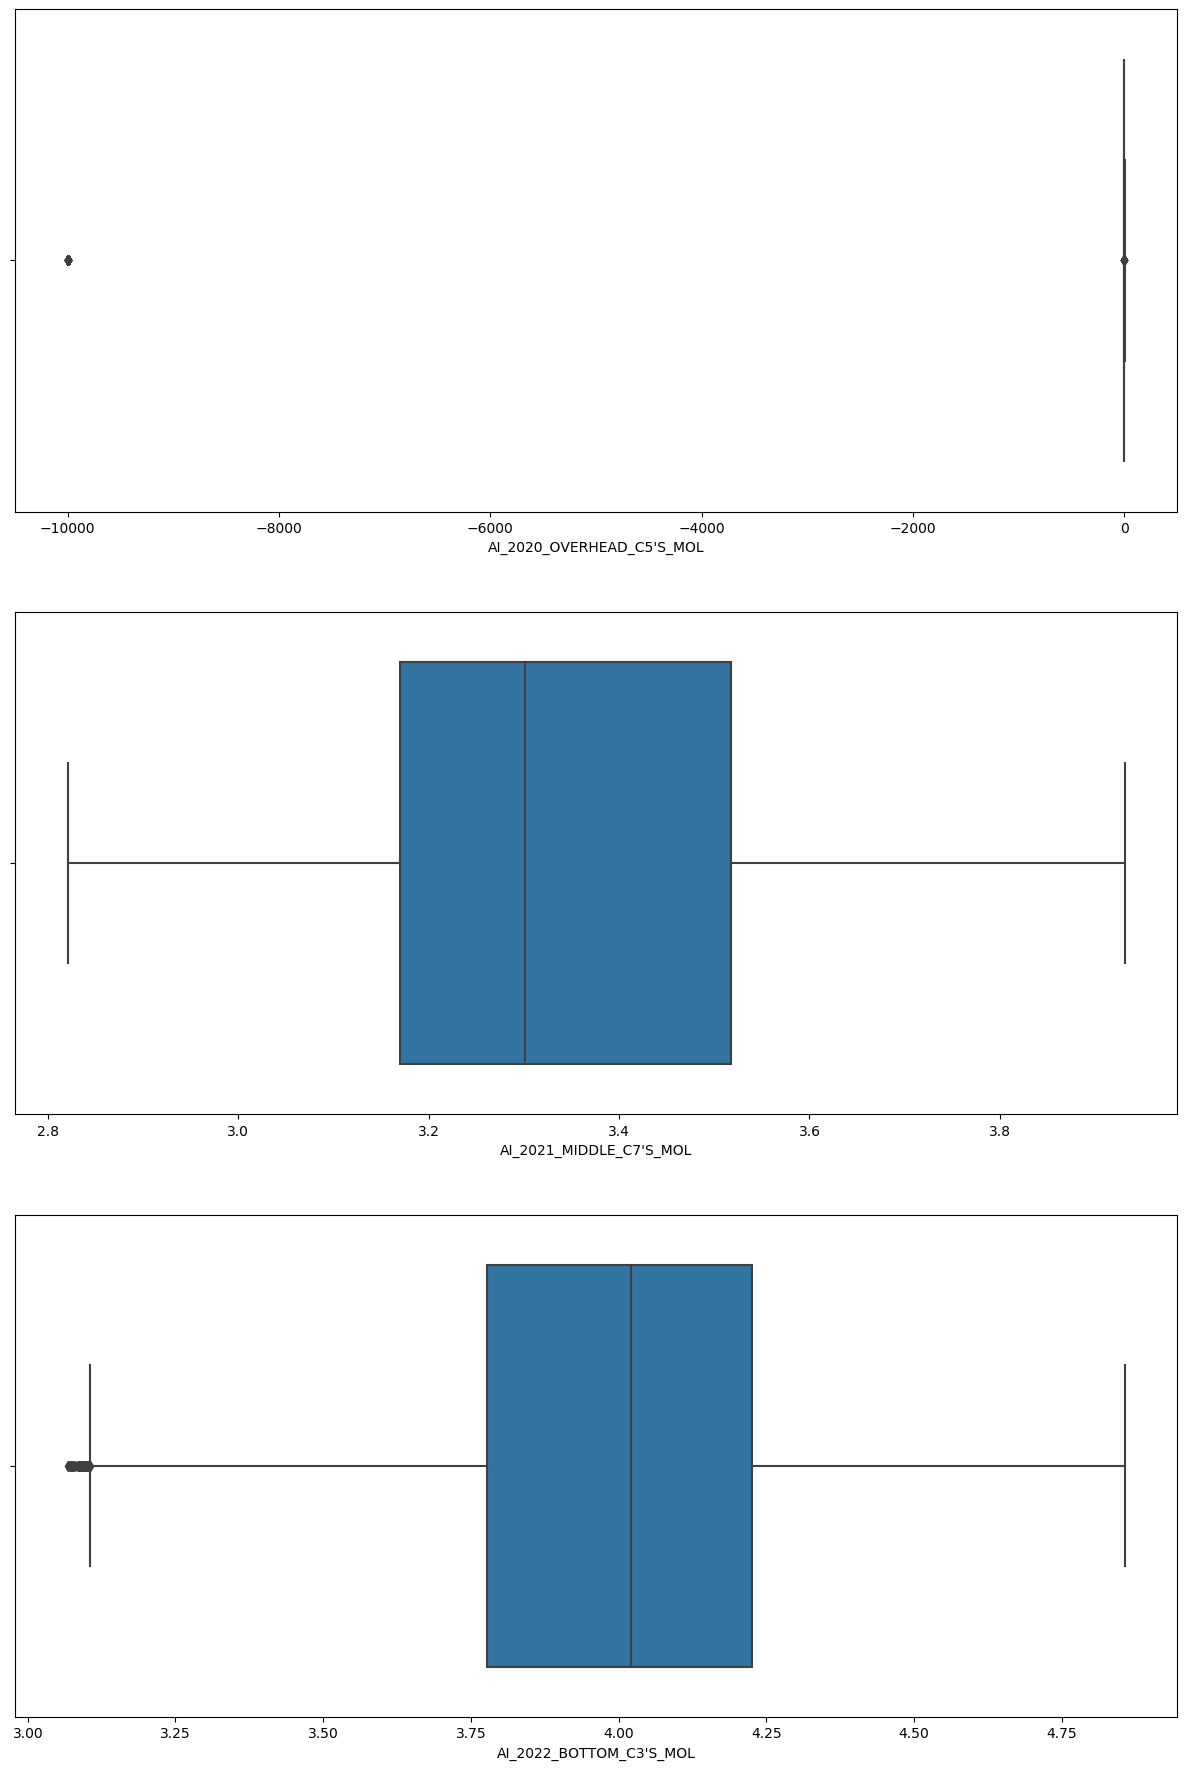

In [17]:
fig3=plt.figure(figsize = (15, 30))

for i in enumerate(manipulated_variables):
    plt.subplot(len(manipulated_variables)+1, 1,i[0]+1)
    fig3=sns.boxplot(df[i[1]])
    fig3.figure.savefig('boxplot_manipulated_variables.png')
plt.show()

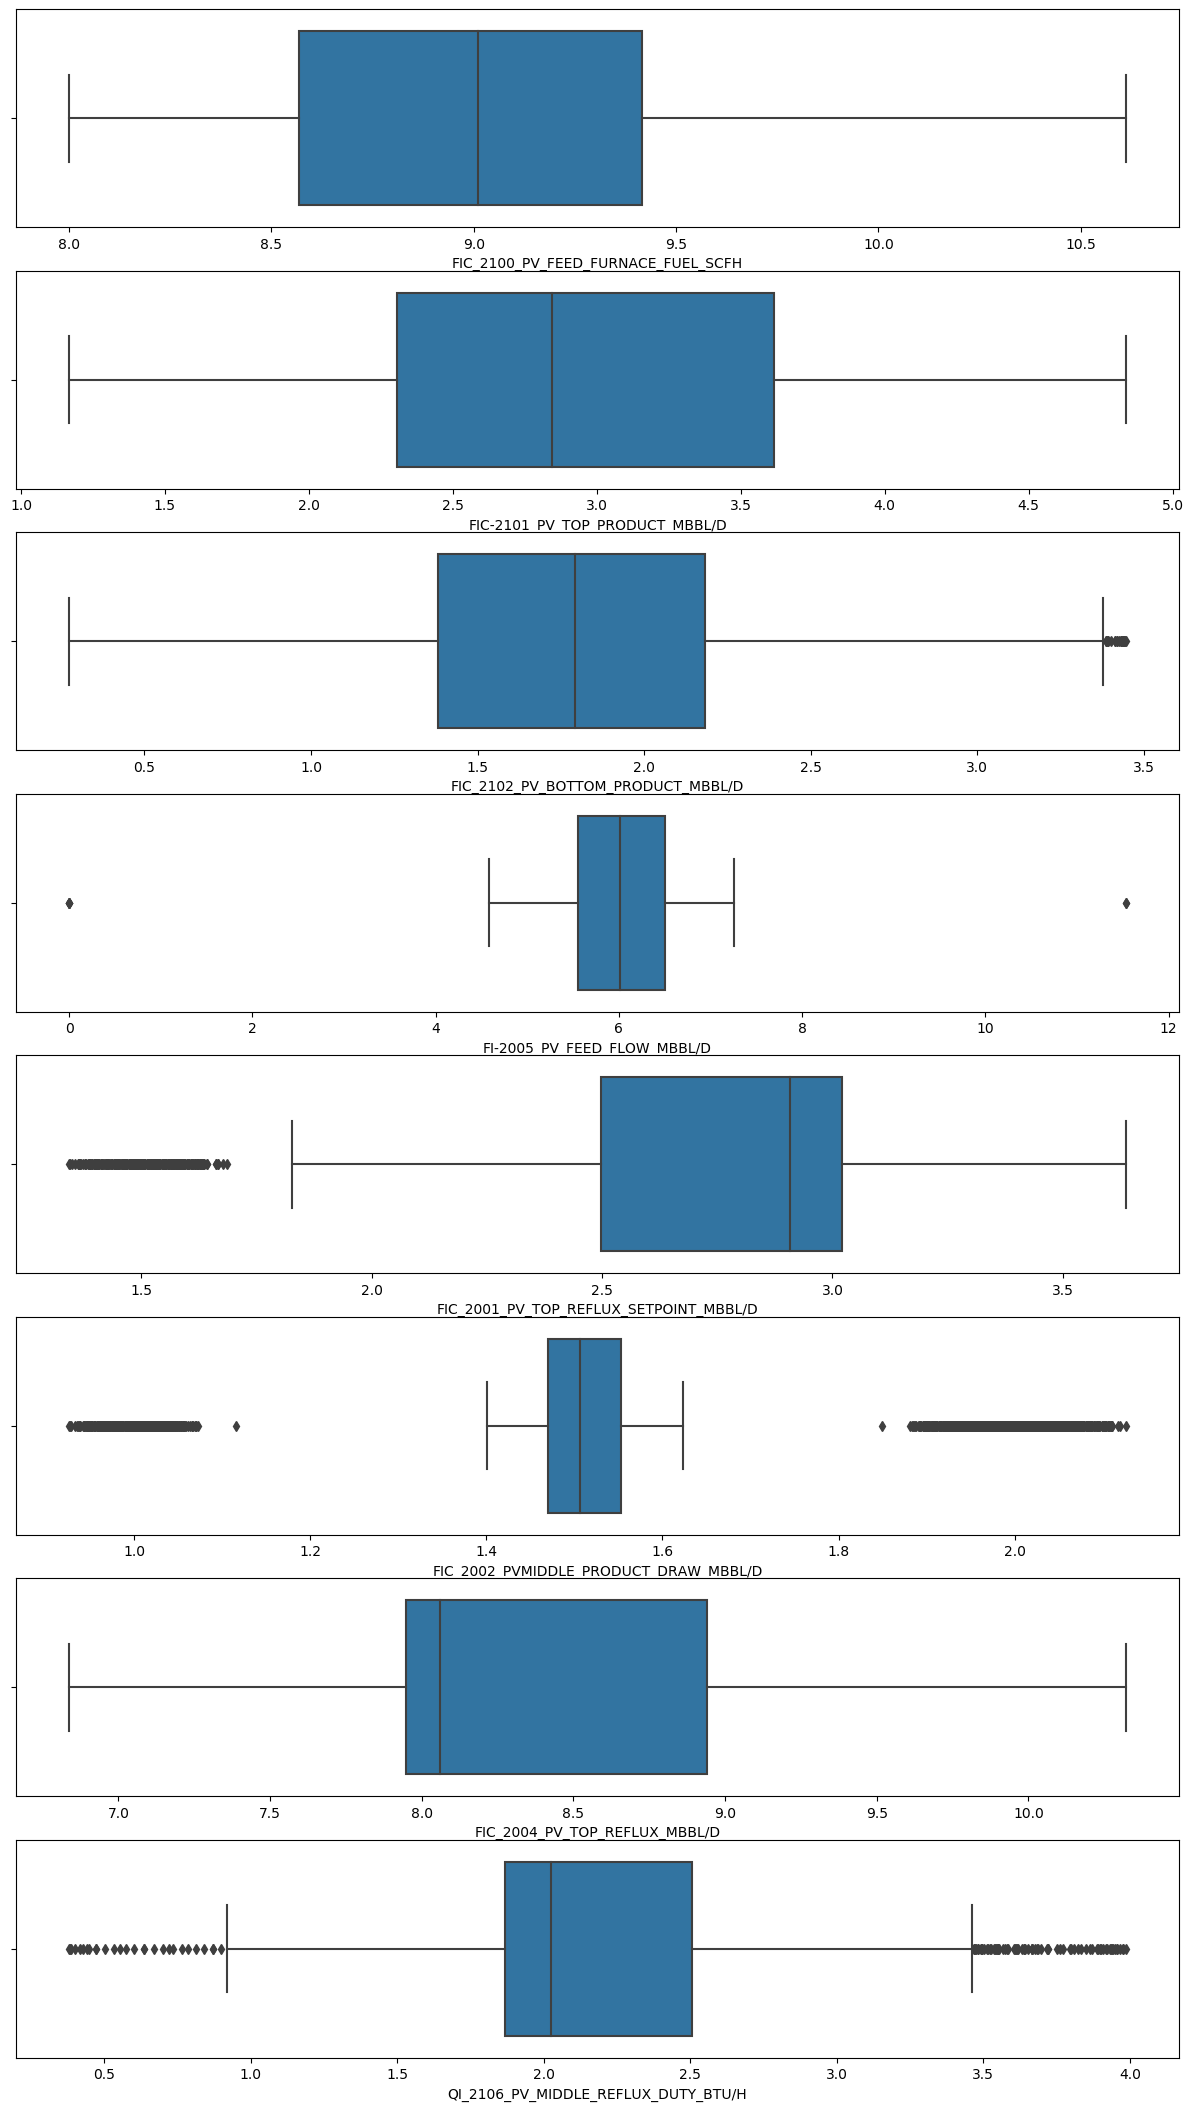

In [20]:
fig4=plt.figure(figsize = (15, 30))

for i in enumerate(response_variables):
    plt.subplot(len(response_variables)+1, 1,i[0]+1)
    fig3=sns.boxplot(df[i[1]])
    fig3.figure.savefig('boxplot_response_variables.png')
plt.show()

In [19]:
df=df[(np.abs(stats.zscore(df["AI_2020_OVERHEAD_C5'S_MOL"])) < 3)]

In [21]:
import matplotlib.dates as mdates
from scipy import stats
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.decomposition import PCA, IncrementalPCA

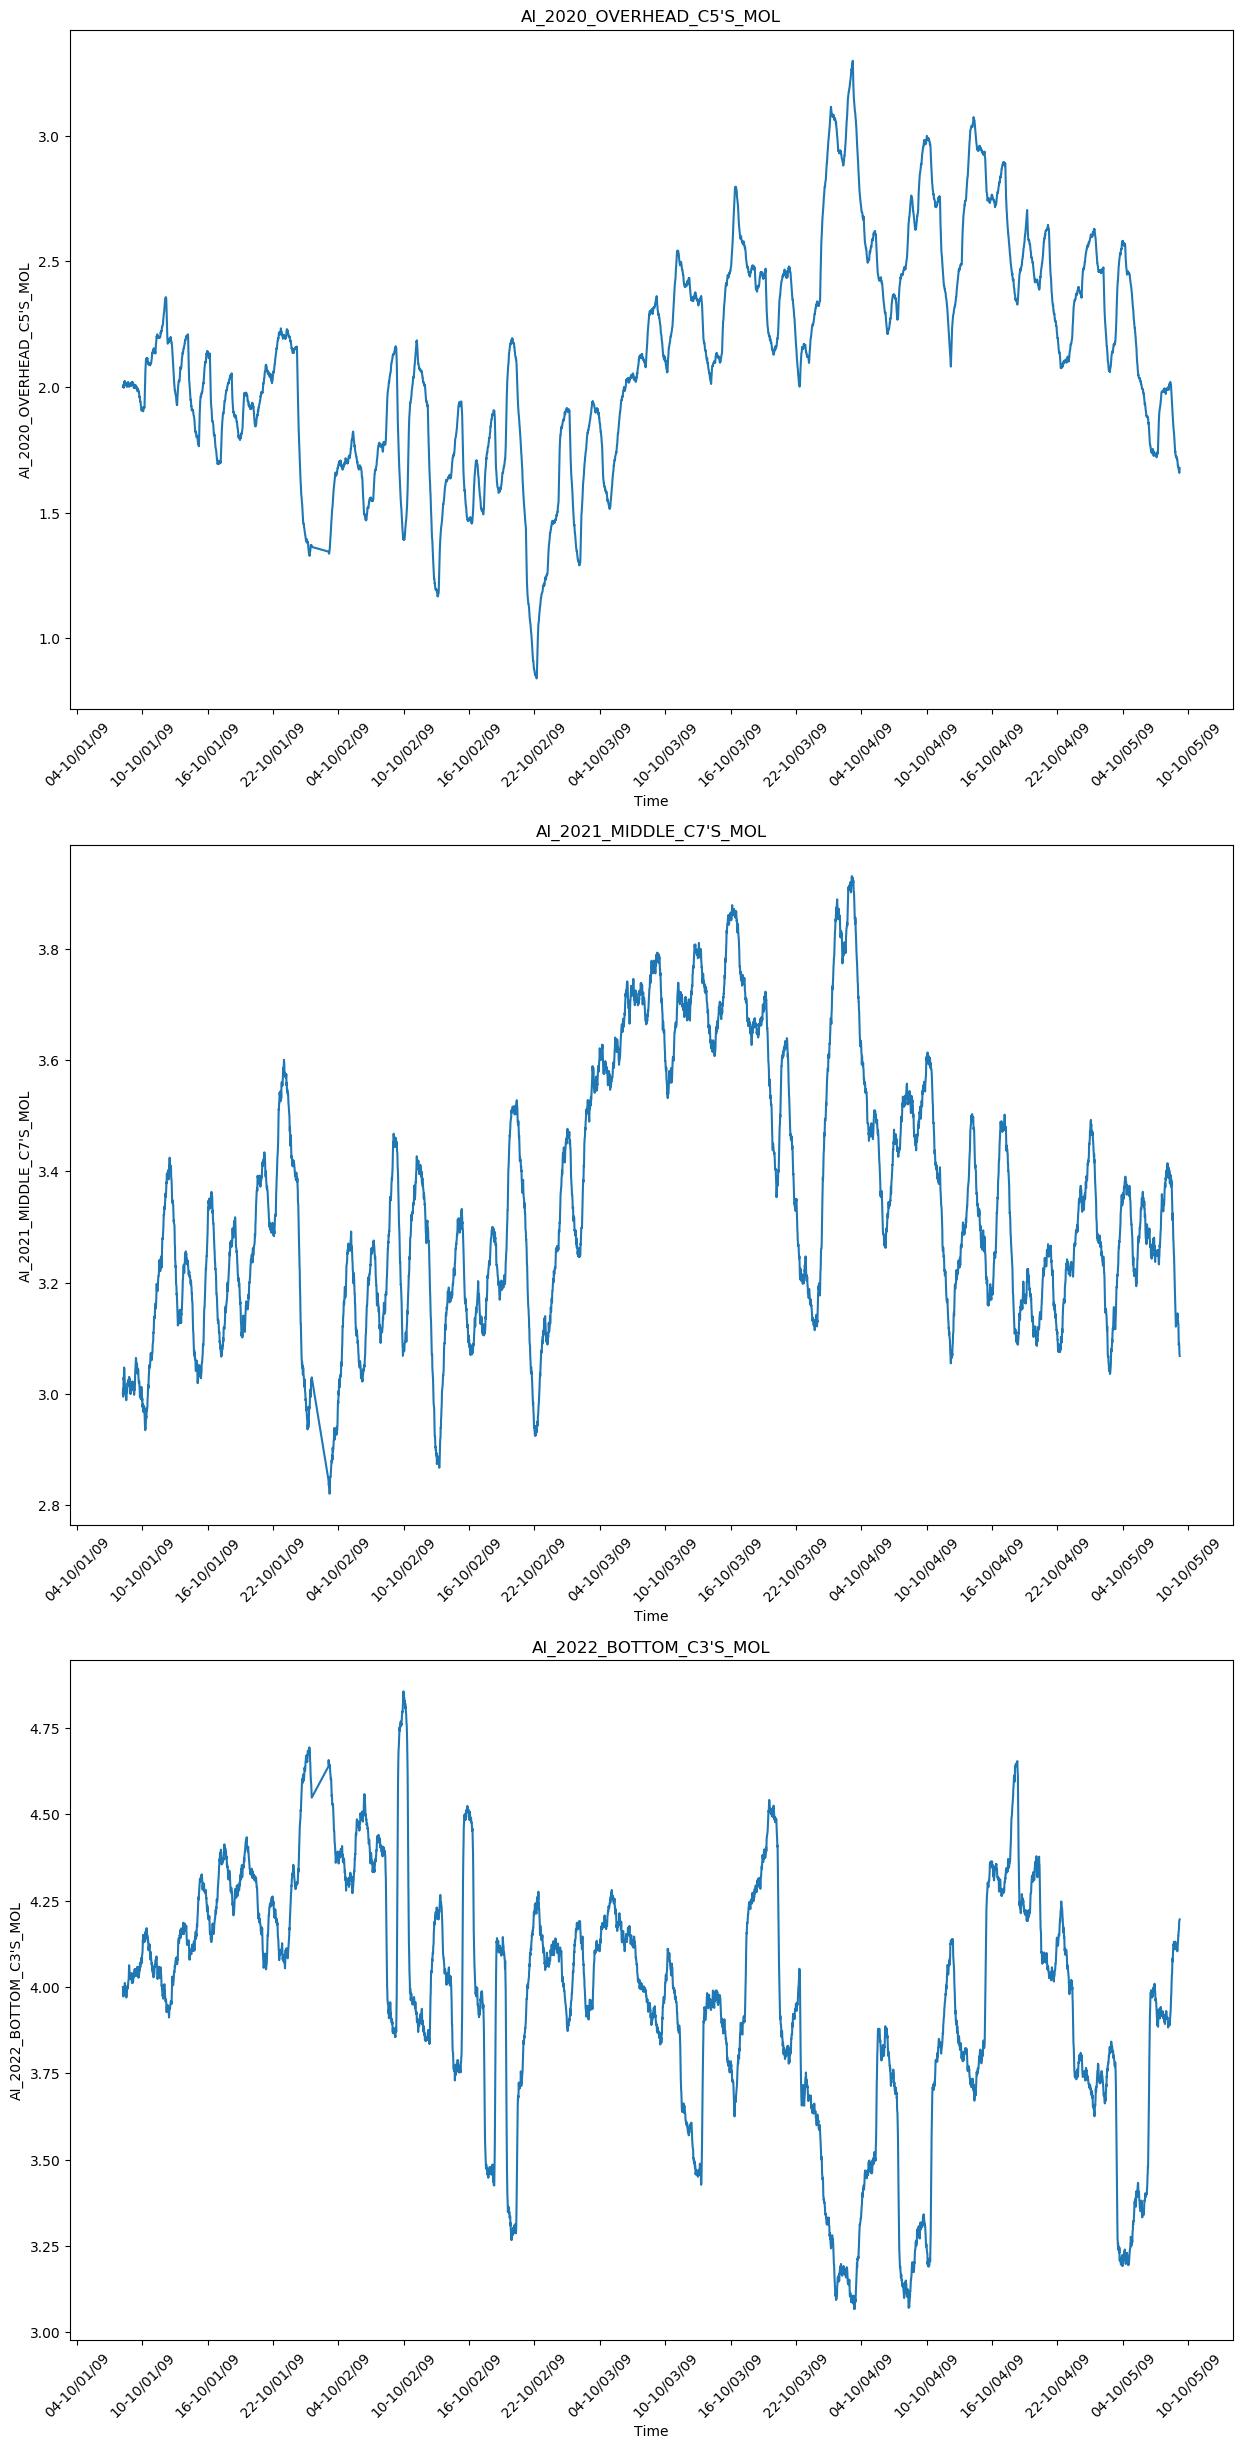

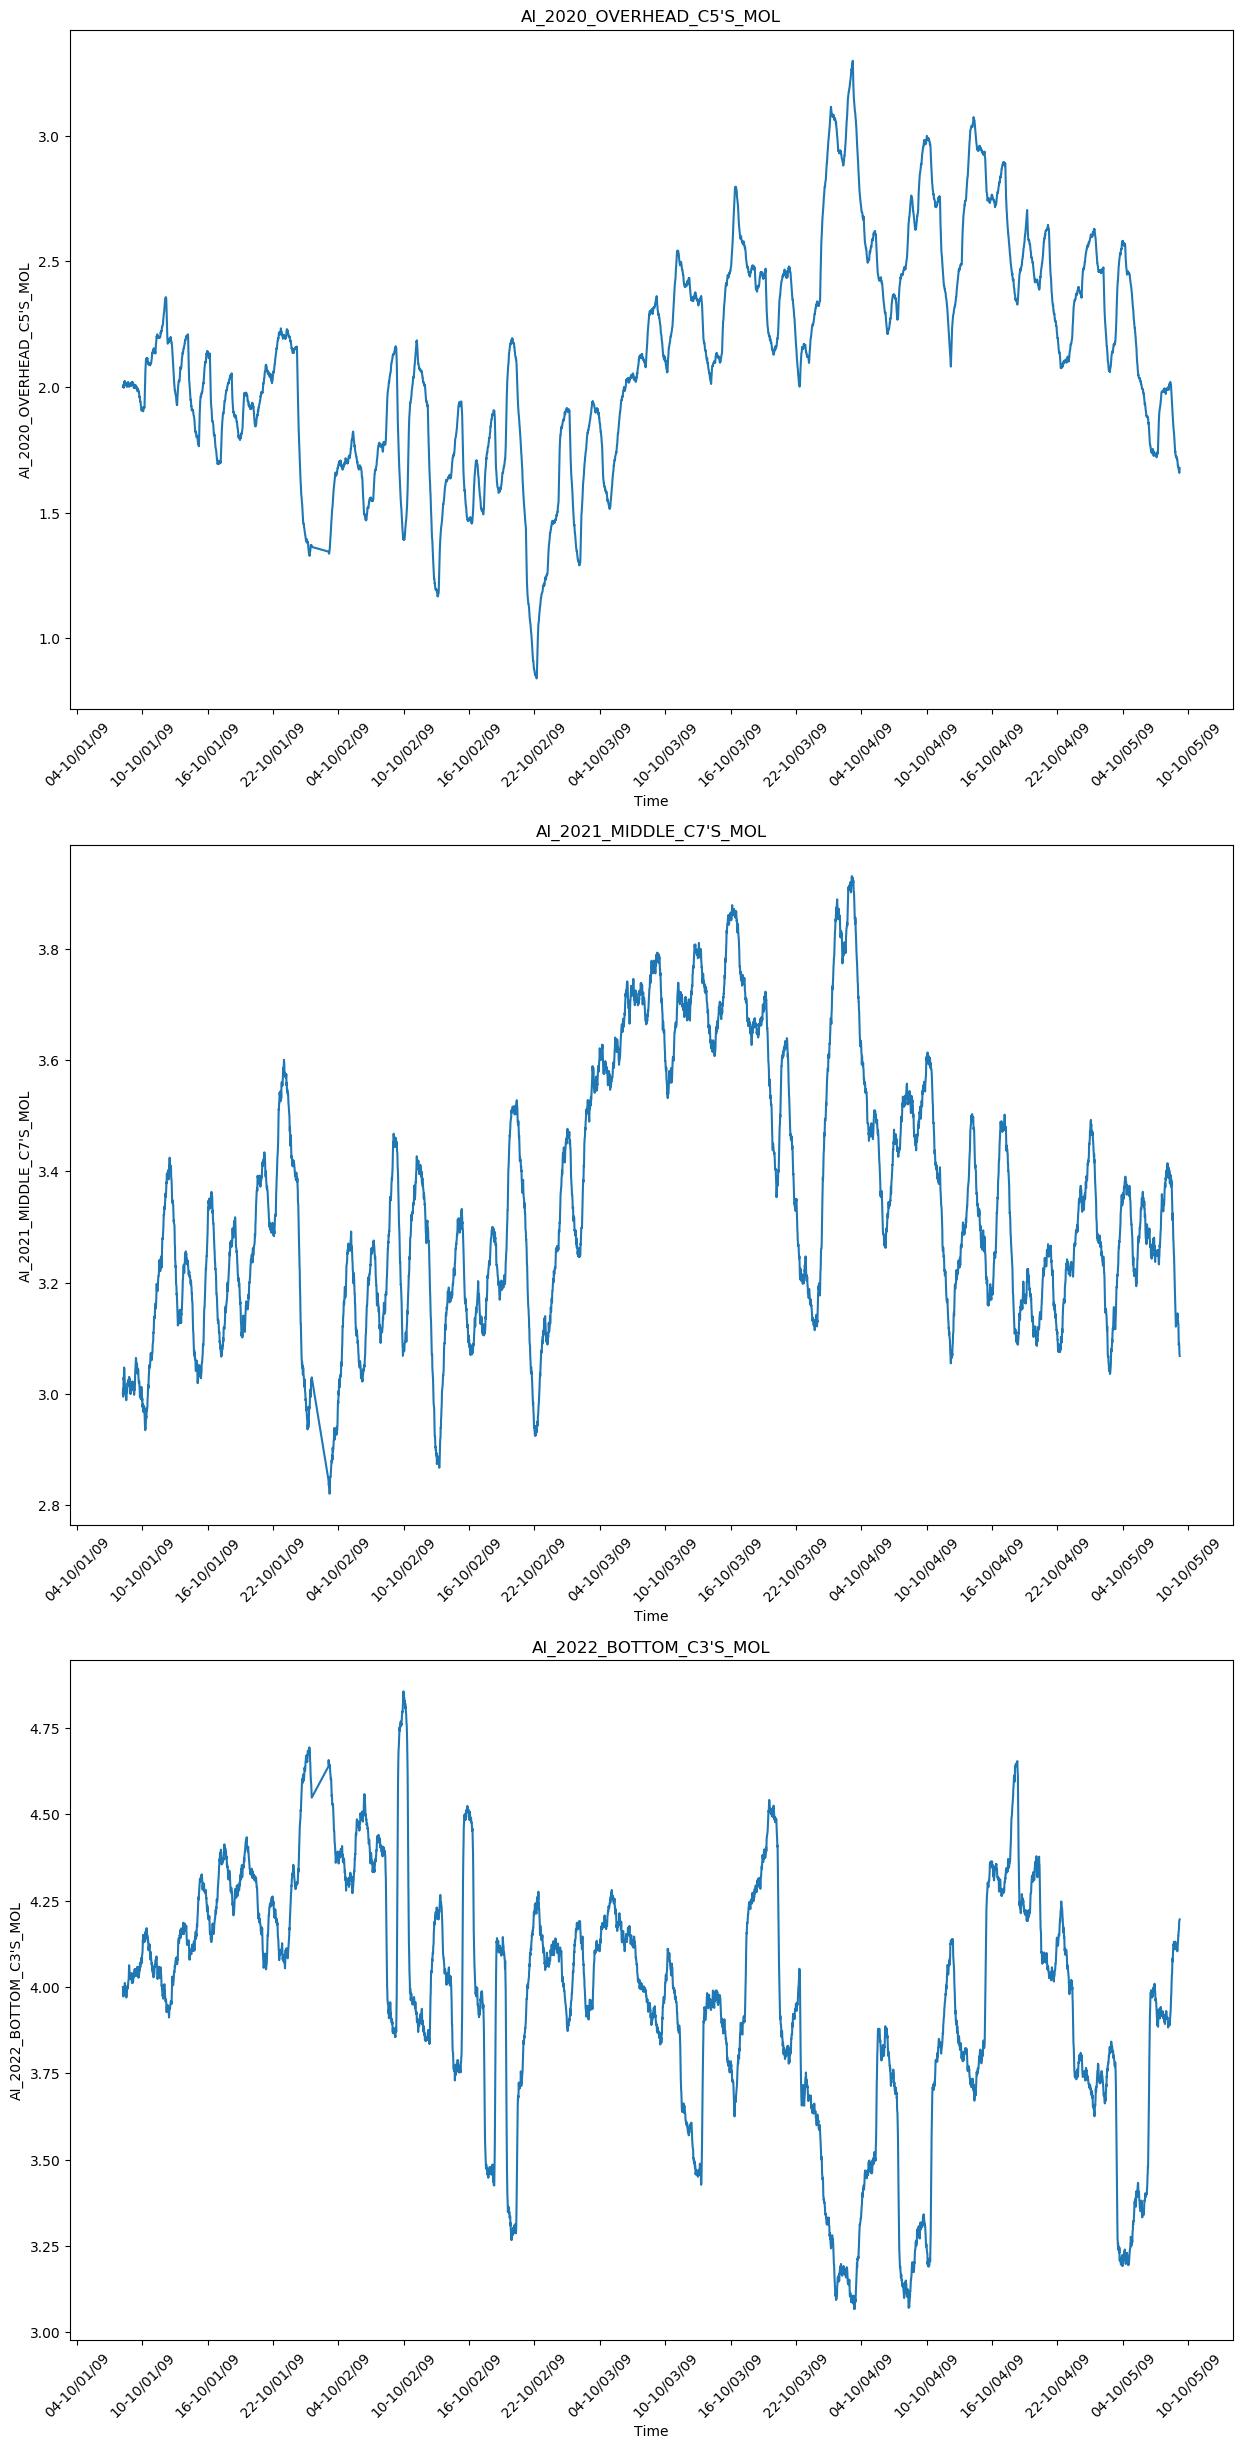

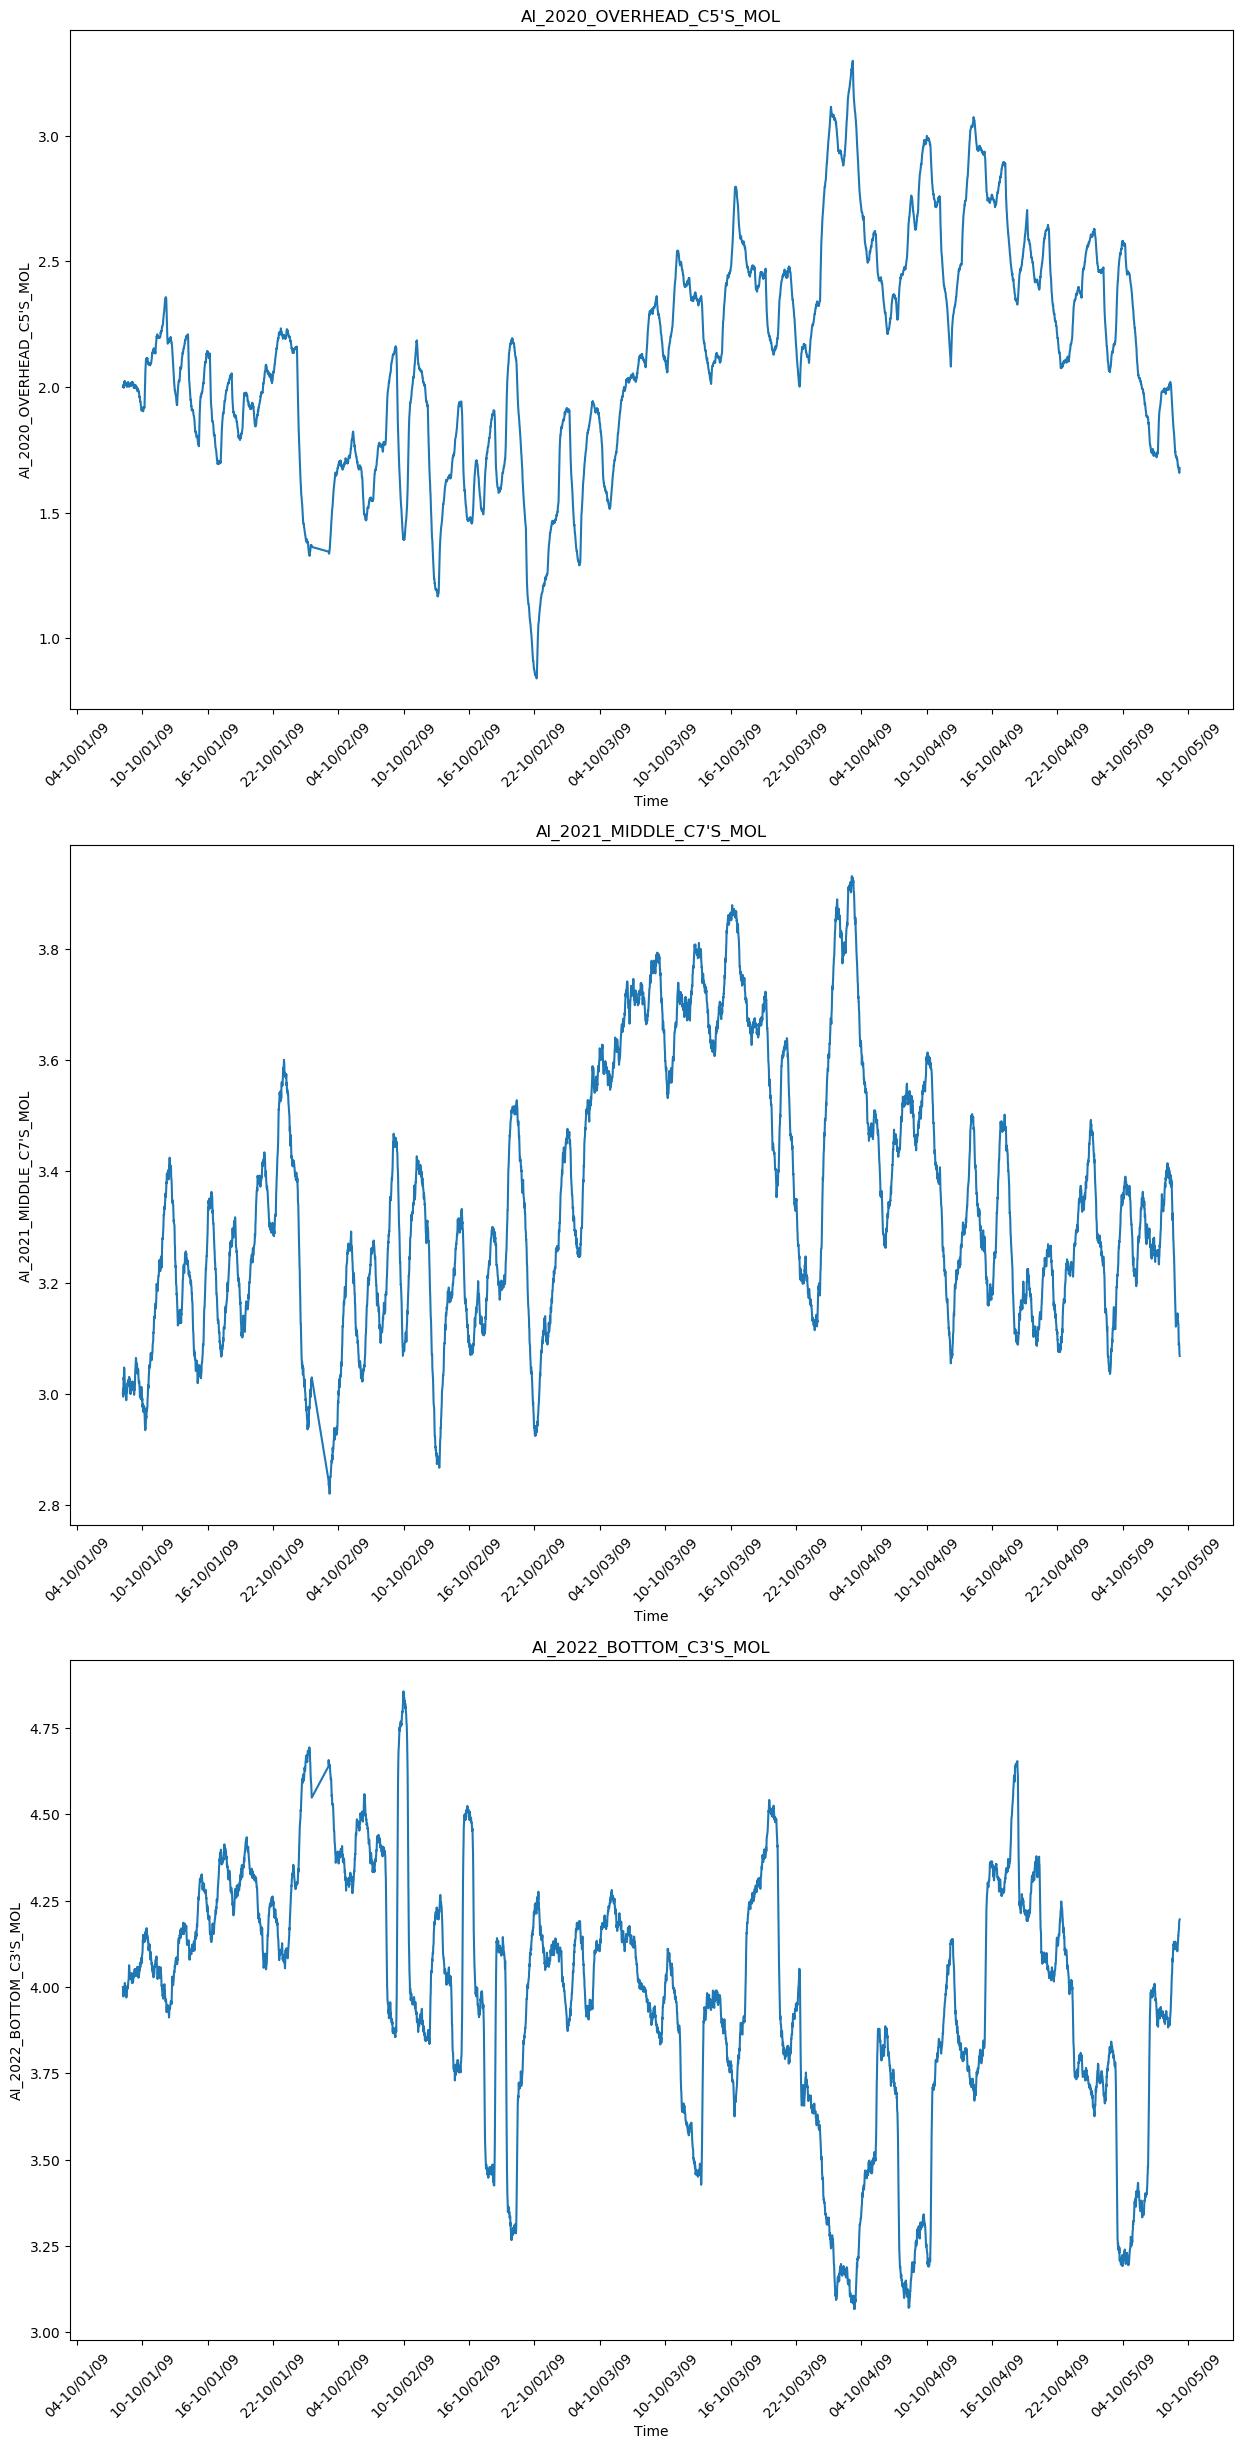

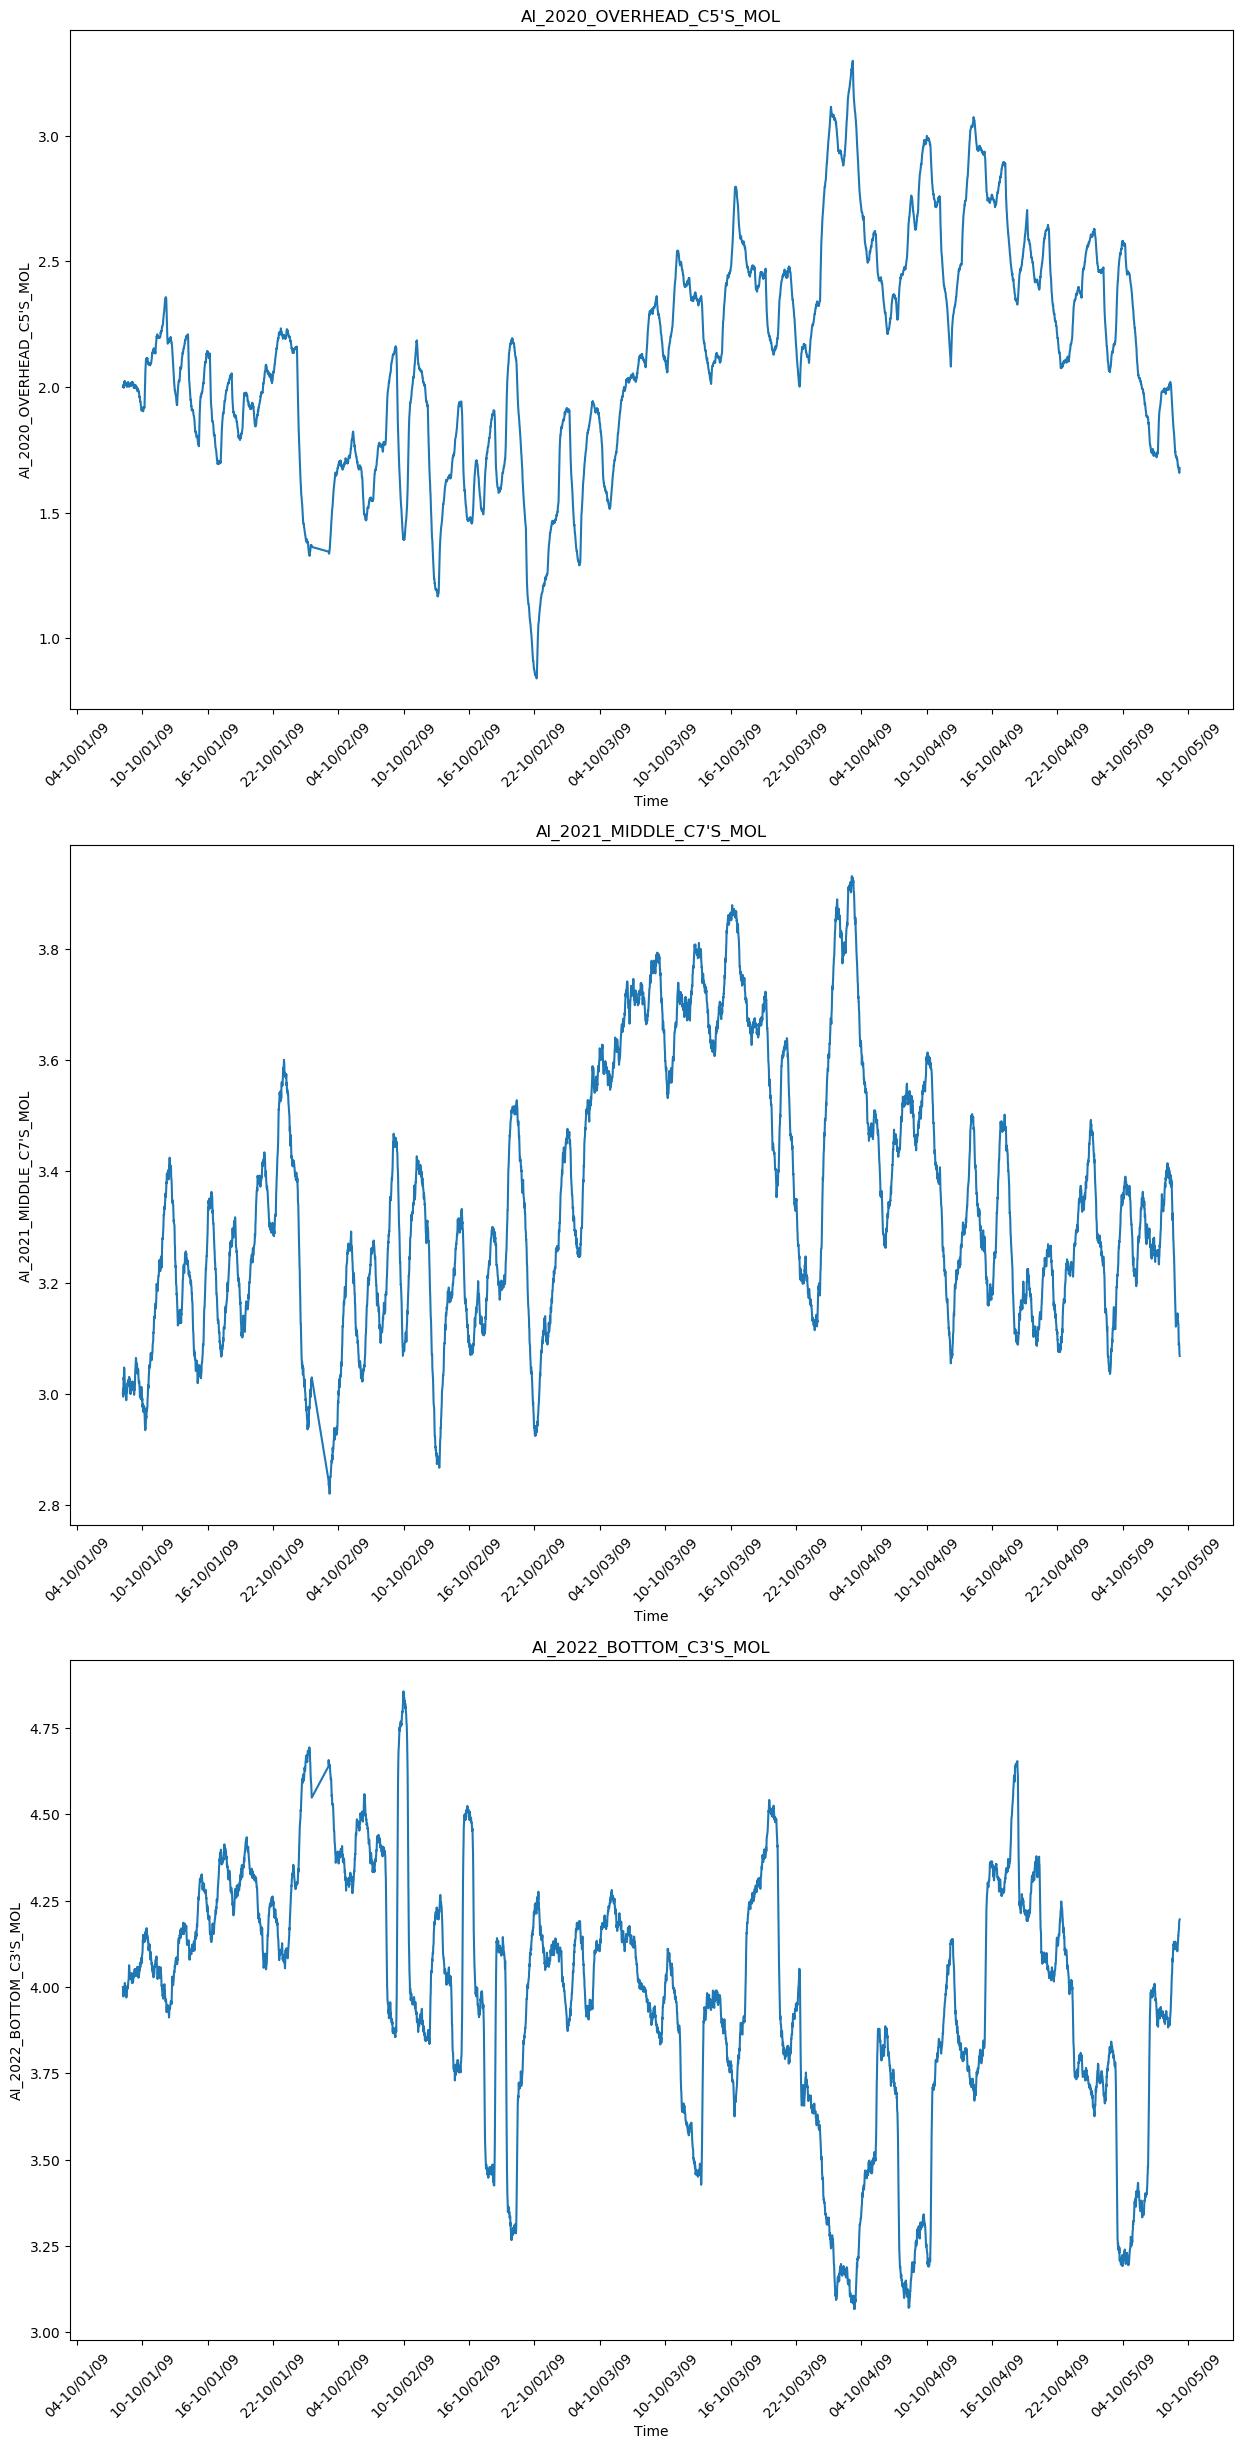

In [26]:
plt.figure(figsize = (15, 30))
for i in enumerate(manipulated_variables):
    plt.subplot(3, 1,i[0]+1)
    plt.plot(df.index,df[i[1]])
    plt.title(df[manipulated_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(df[manipulated_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)

plt.savefig('manipulated_variables.png')

plt.show()

<Figure size 1500x3000 with 0 Axes>

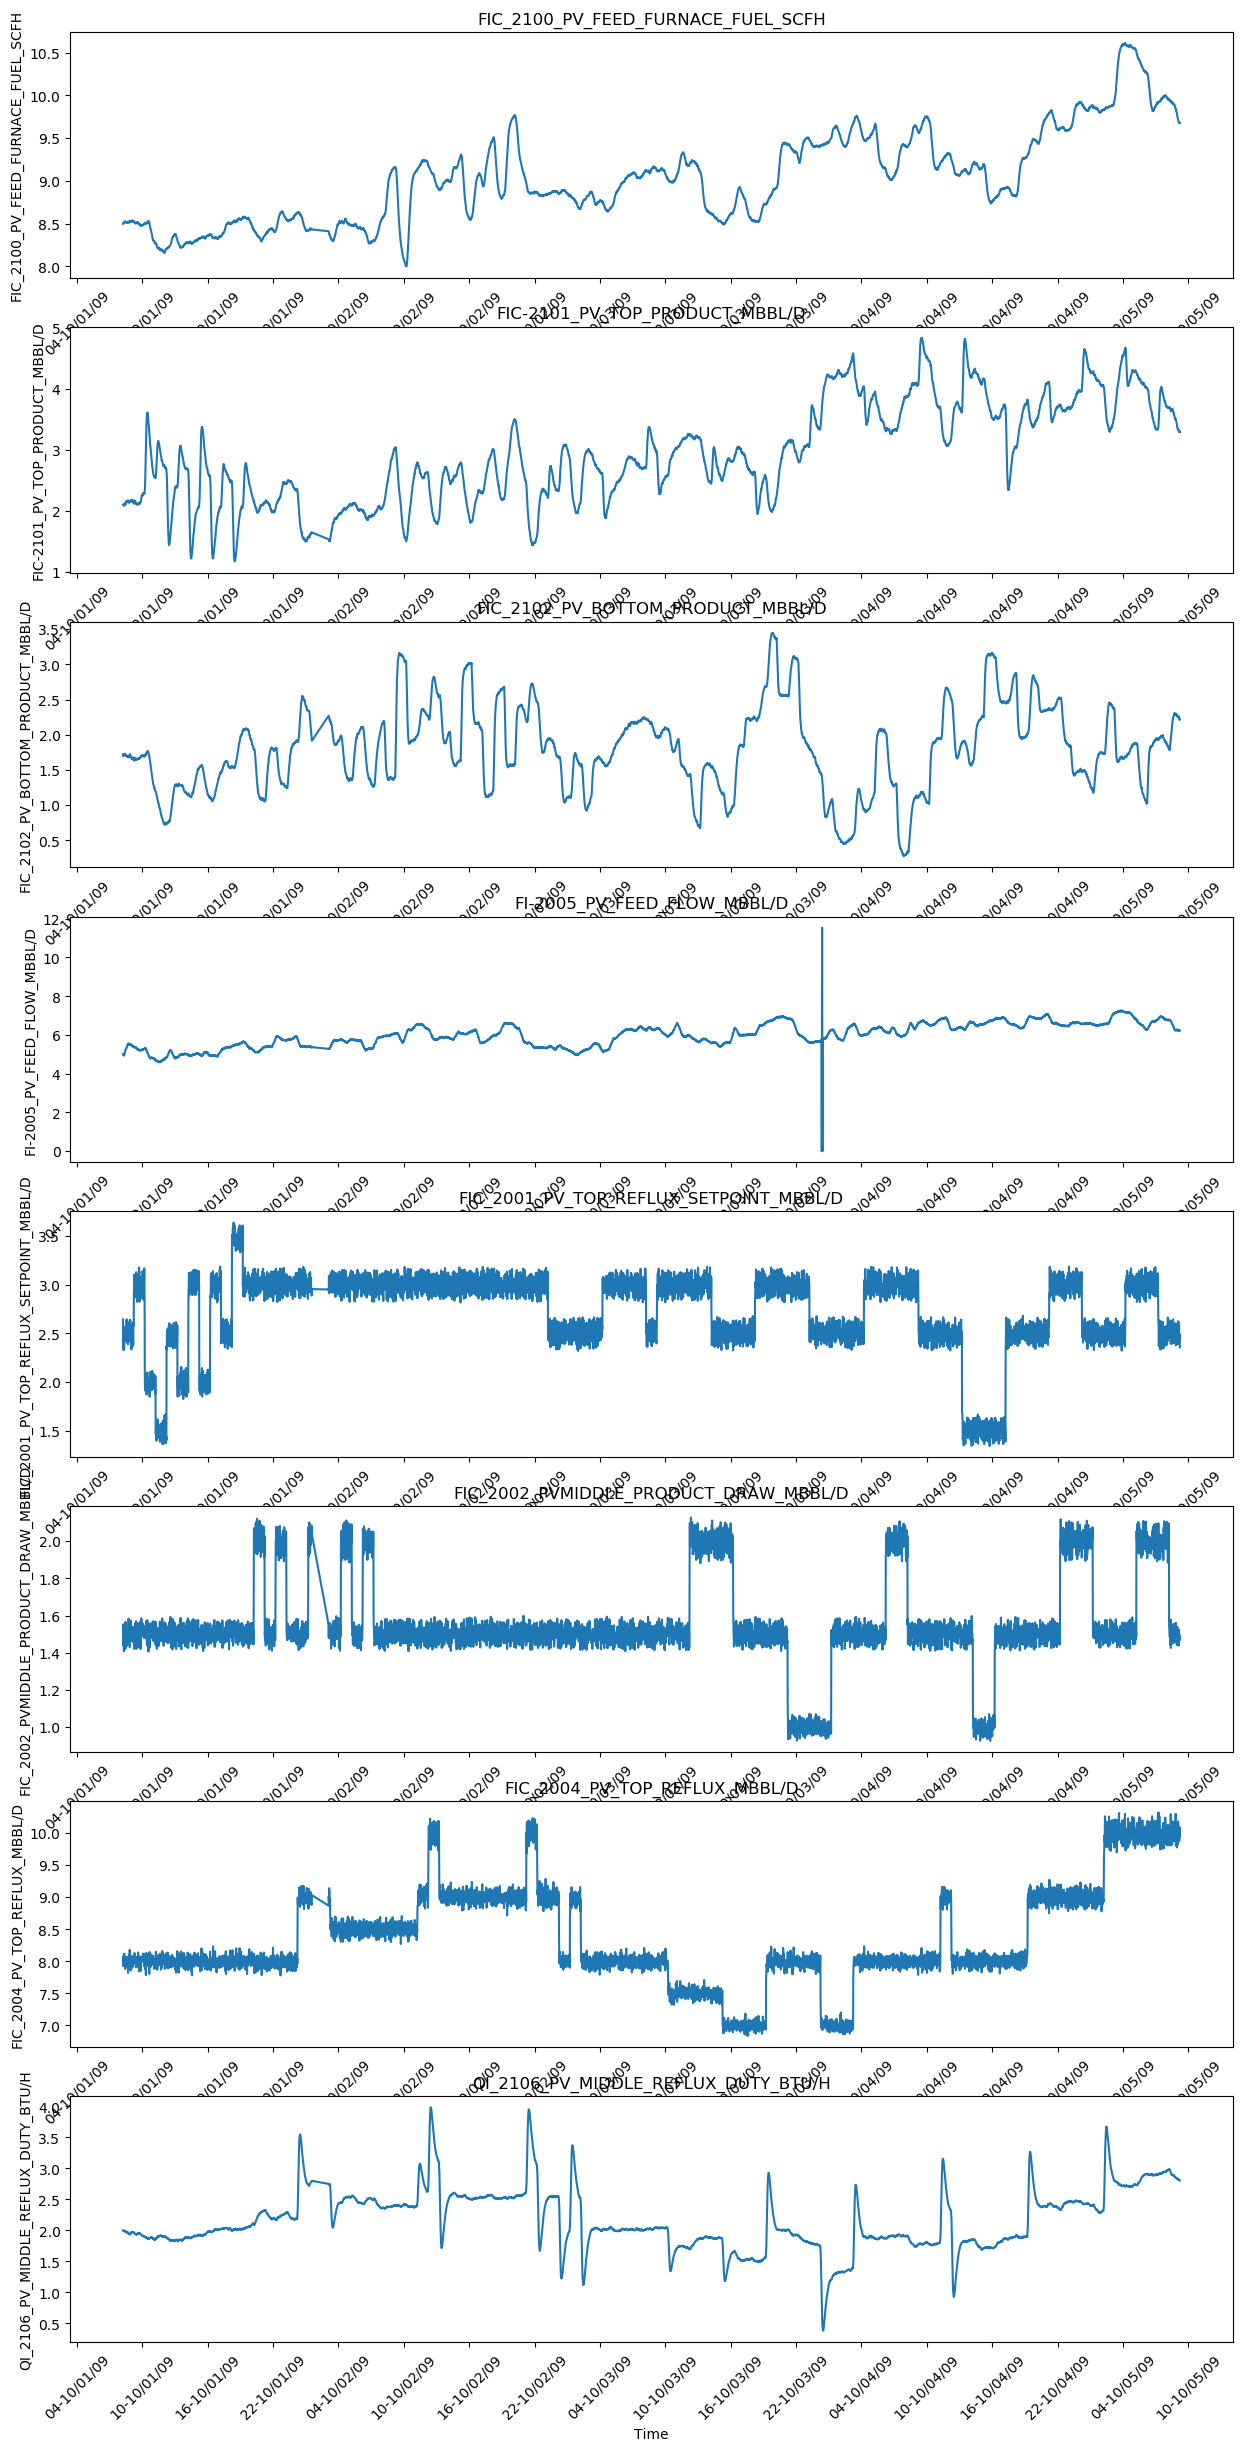

In [28]:
plt.figure(figsize = (15, 30))
for i in enumerate(response_variables):
    plt.subplot(8, 1,i[0]+1)
    plt.plot(df.index,df[i[1]])
    plt.title(df[response_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(df[response_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)

plt.savefig('response_variables.png')
plt.show()

In [ ]:
FIC_reflux_top=['FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D','FIC-2001_OP_TOP_REFLUX_OUTPUT_%','FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D']
FIC_reflux_middle=[ 'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D']
FIC_reflux_bottom=['FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 'FIC_2004_PV_TOP_REFLUX_MBBL/D']
furnace=['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH','TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF']

In [ ]:
plt.figure(figsize = (15, 5))
for i in enumerate(furnace):
    plt.plot(df["Time"],df[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
for i in enumerate(FIC_reflux_middle):
    plt.plot(good_data["Time"],good_data[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    #plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

In [ ]:
target=good_data[manipulated_variables]
data=good_data[controlled_variables+reponse_variables]

In [ ]:
data.corr()

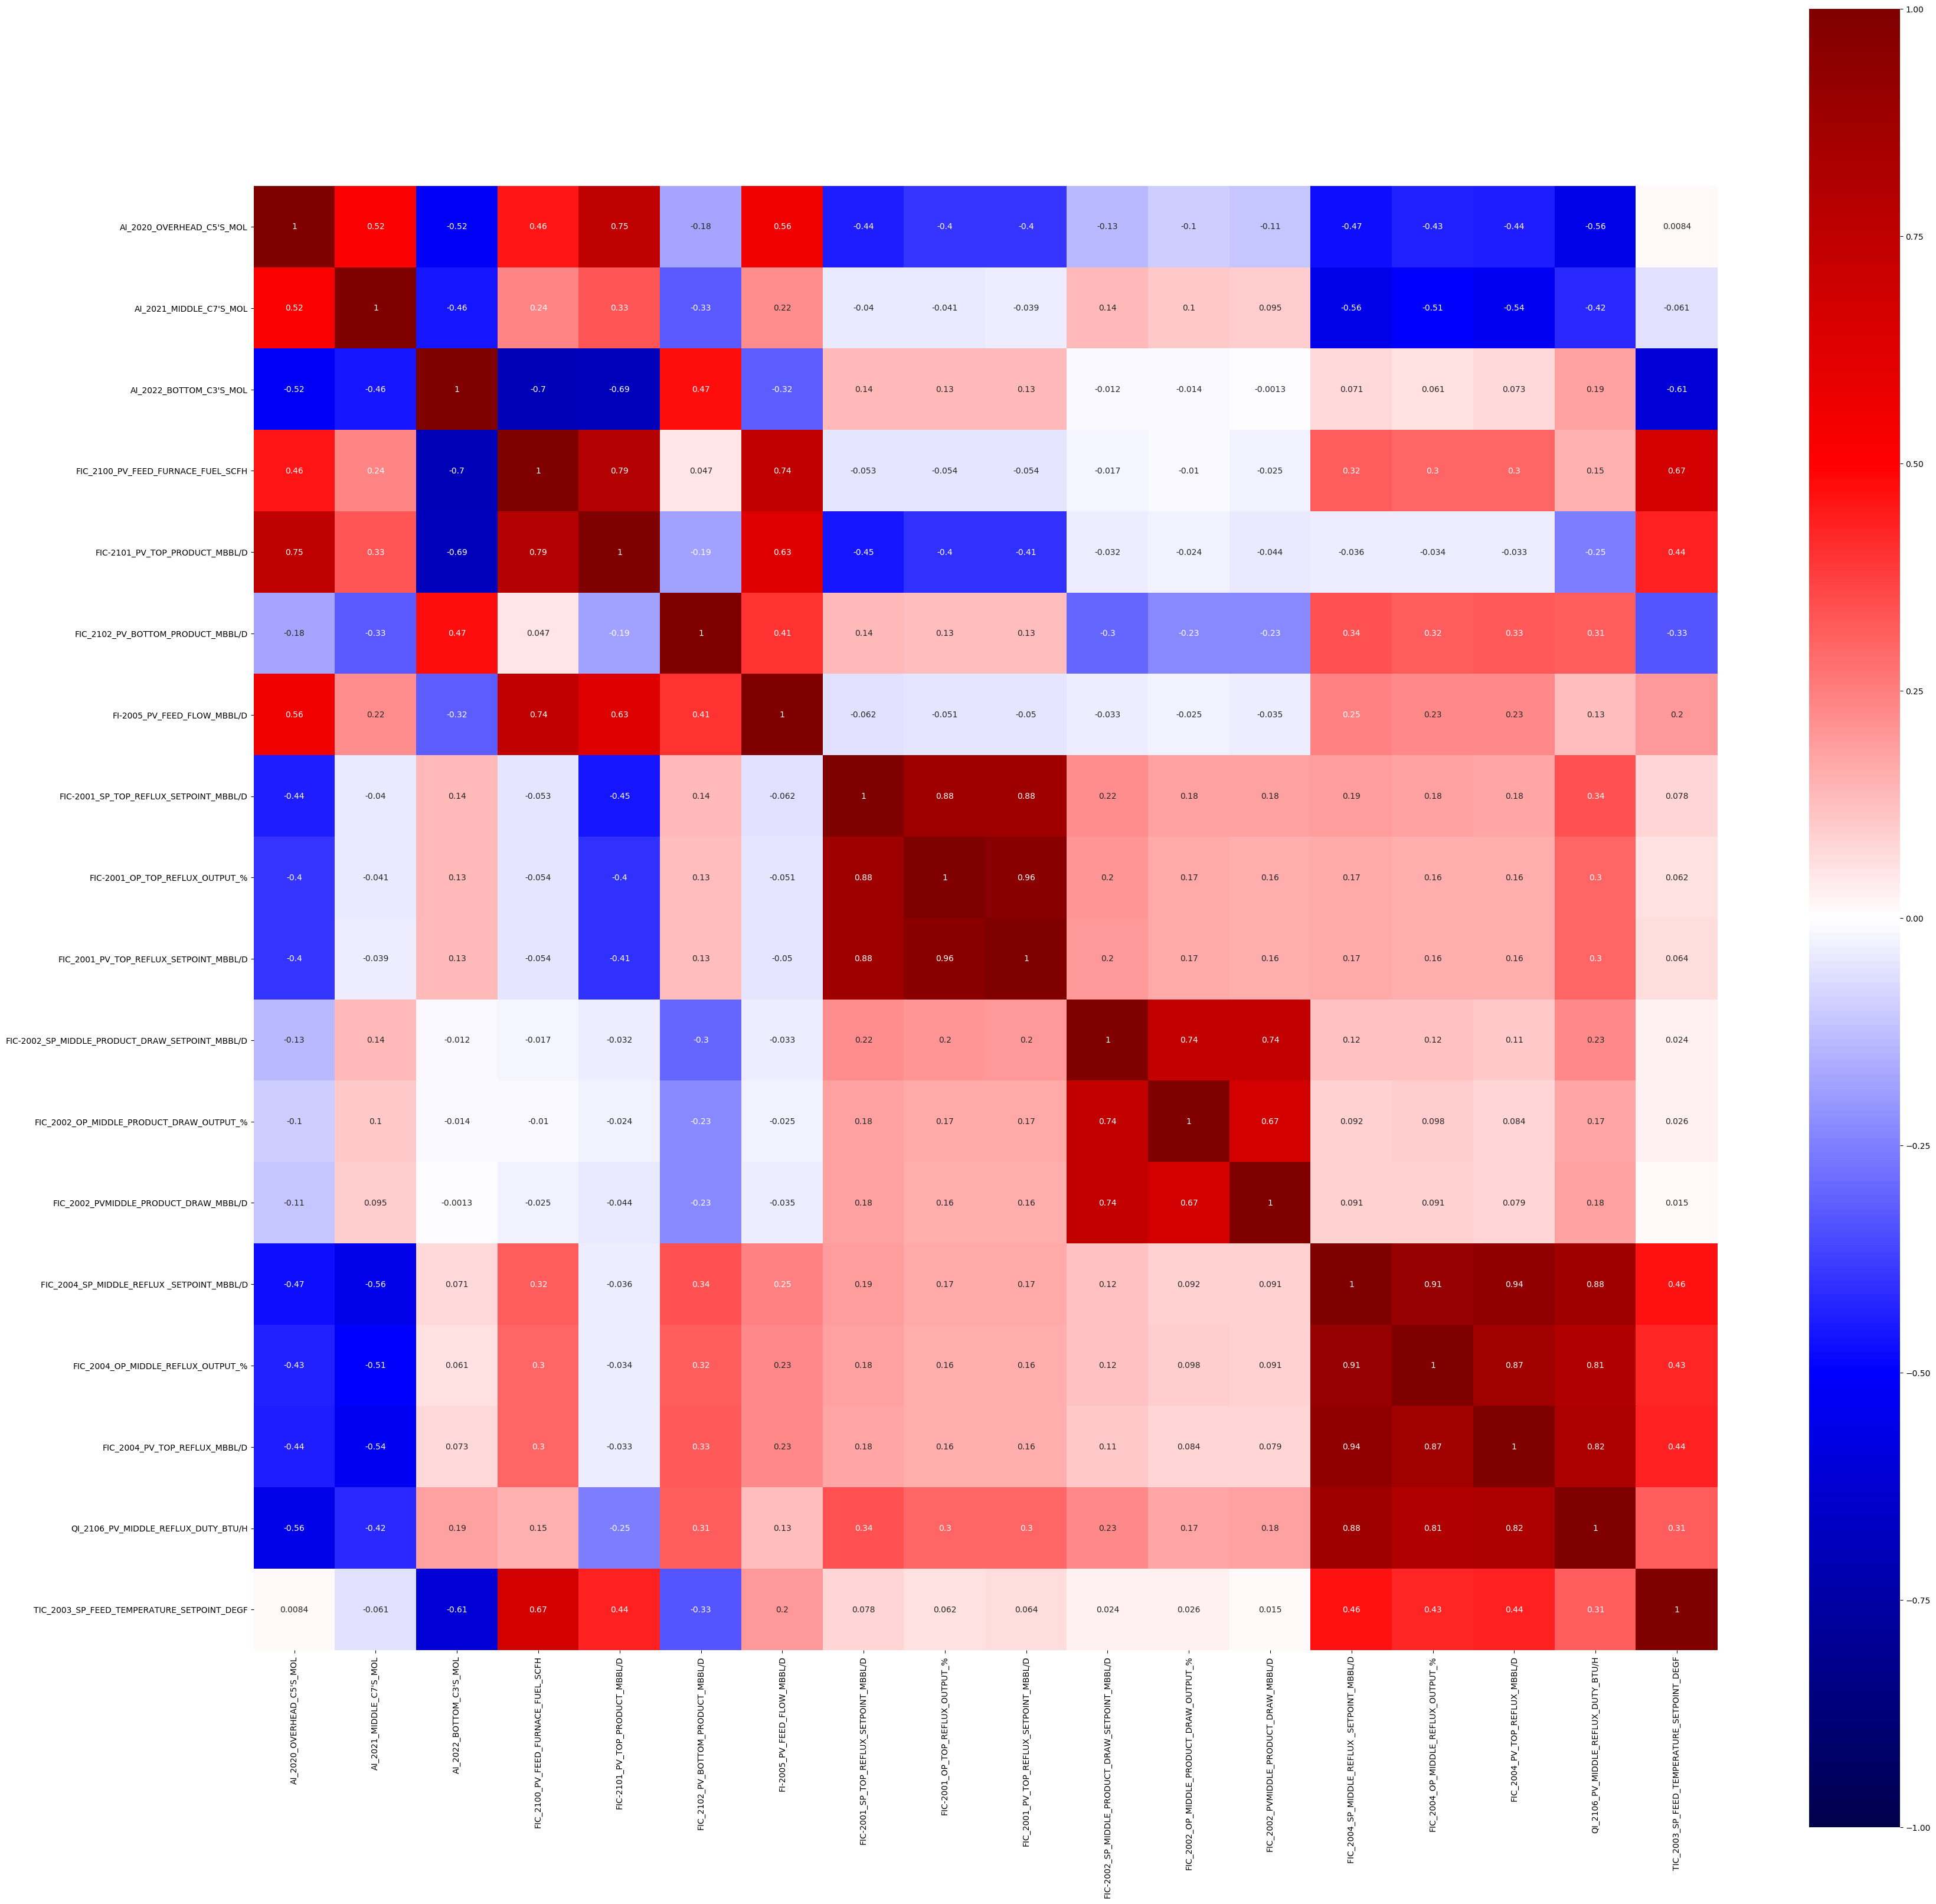

In [29]:
#find the correlation between features
plt.figure(figsize=(40,40))
fig3=sns.heatmap(df.corr(method='spearman'),vmin=-1,vmax=1,cmap= 'seismic',annot=True,square=True)
fig3.figure.savefig('heat map correlation.png')
plt.show()

### Principle components analysis

### regression model

In [34]:
X=df.iloc[:,0:1]
print(X.head())
len(X.columns)

                     AI_2020_OVERHEAD_C5'S_MOL
Time                                          
2009-10-01 08:14:00                    2.00000
2009-10-01 08:15:00                    2.00360
2009-10-01 08:16:00                    2.00870
2009-10-01 08:17:00                    2.00385
2009-10-01 08:18:00                    1.99852


1

In [36]:
y=df.iloc[:,3:5]
print(y.head())
len(y.columns)

                     FIC_2100_PV_FEED_FURNACE_FUEL_SCFH  \
Time                                                      
2009-10-01 08:14:00                             8.50000   
2009-10-01 08:15:00                             8.50735   
2009-10-01 08:16:00                             8.50977   
2009-10-01 08:17:00                             8.50838   
2009-10-01 08:18:00                             8.50365   

                     FIC-2101_PV_TOP_PRODUCT_MBBL/D  
Time                                                 
2009-10-01 08:14:00                         2.10000  
2009-10-01 08:15:00                         2.09686  
2009-10-01 08:16:00                         2.09280  
2009-10-01 08:17:00                         2.08587  
2009-10-01 08:18:00                         2.08028  


2

In [37]:
#Import Libraries
import sklearn
from sklearn.model_selection import train_test_split

In [38]:

#----------------------------------------------------

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3838, 1)
X_test shape is  (1891, 1)
y_train shape is  (3838, 2)
y_test shape is  (1891, 2)


In [39]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [40]:
LinearRegModel=LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=1)
LinearRegModel.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [41]:
print('Linear Regression Train Score is : ' , LinearRegModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegModel.coef_)
print('Linear Regression intercept is : ' , LinearRegModel.intercept_)
print('----------------------------------------------------')


Linear Regression Train Score is :  0.4514884806616704
Linear Regression Test Score is :  0.4450428960133827
Linear Regression Coef is :  [[0.50615865]
 [1.39966586]]
Linear Regression intercept is :  [ 7.96631817 -0.0347141 ]
----------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi